In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import random
from sklearn.metrics import accuracy_score
from sklearn import metrics  
import math
from sklearn.metrics import r2_score
import sklearn.preprocessing as preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns 

# Assign colum names to the dataset
names = ['ntp', 'pgc', 'dbp', 'tst', 'si','bmi','dpf','age','label']

# Read dataset to pandas dataframe
dataset = pd.read_csv("D:\CODING\AI_ML\ML_Task_Acc\MLAssignment.csv", names=names)

dataset.head()

,ntp,pgc,dbp,tst,si,bmi,dpf,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ntp,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
pgc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
dbp,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
tst,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
si,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
label,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#checking for null values
dataset.isnull().head(10)

,ntp,pgc,dbp,tst,si,bmi,dpf,age,label
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [7]:
#total no of null in each column
dataset.isnull().sum()

ntp      0
pgc      0
dbp      0
tst      0
si       0
bmi      0
dpf      0
age      0
label    0
dtype: int64

In [8]:
diabetes_ds_copy = dataset.copy(deep = True)
diabetes_ds_copy[['ntp', 'pgc', 'dbp', 'tst', 'si','bmi','dpf','age']] = diabetes_ds_copy[['ntp', 'pgc', 'dbp', 'tst', 'si','bmi','dpf','age']].replace(0,np.NaN)

# Showing the Count of NANs
print(diabetes_ds_copy.isnull().sum())

ntp      111
pgc        5
dbp       35
tst      227
si       374
bmi       11
dpf        0
age        0
label      0
dtype: int64


In [9]:
diabetes_ds_copy.head(5)

,ntp,pgc,dbp,tst,si,bmi,dpf,age,label
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


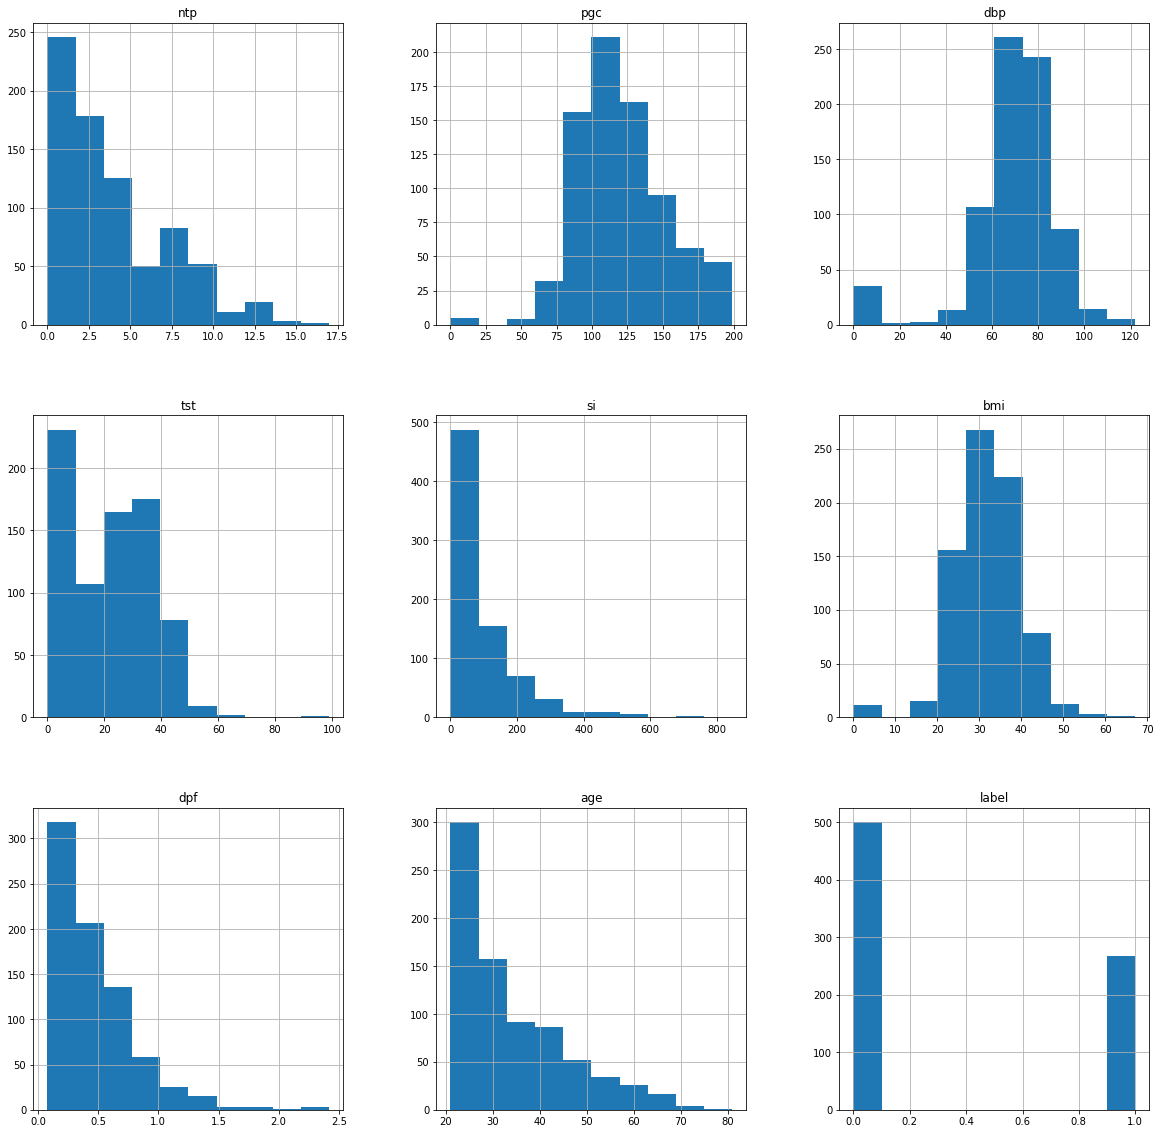

In [10]:
p = dataset.hist(figsize = (20,20))

0    500
1    268
Name: label, dtype: int64


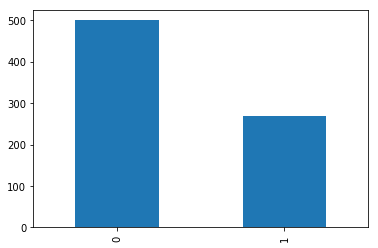

In [12]:
print(dataset.label.value_counts())
p=dataset.label.value_counts().plot(kind="bar")

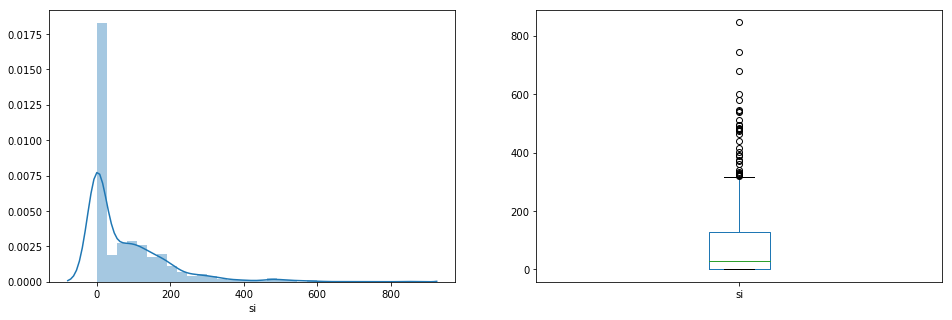

In [13]:
plt.subplot(121), sns.distplot(dataset['si'])
plt.subplot(122), dataset['si'].plot.box(figsize=(16,5))
plt.show()

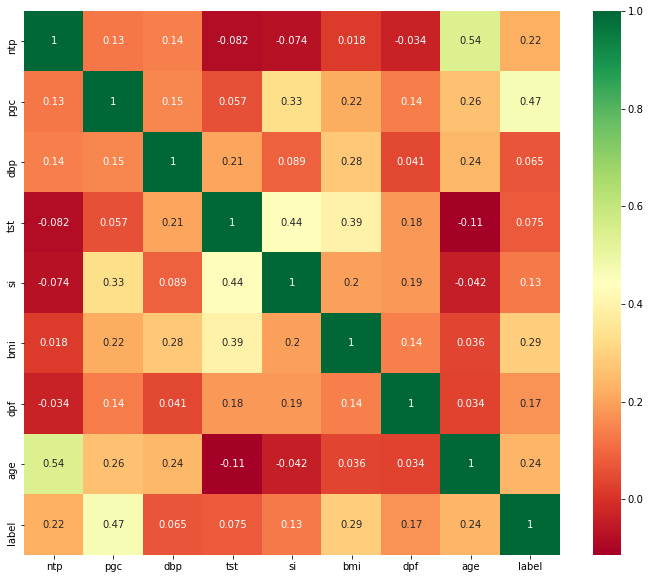

In [21]:
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(dataset.corr(), annot=True,cmap ='RdYlGn')

In [15]:

from sklearn.preprocessing import StandardScaler

In [16]:
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(dataset.drop(["label"],axis = 1),), columns=['ntp', 'pgc', 'dbp', 'tst', 'si','bmi','dpf','age'])
X.head()

D:\CODING\Anaconda_env\DNN-AWS-PY36\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\CODING\Anaconda_env\DNN-AWS-PY36\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,ntp,pgc,dbp,tst,si,bmi,dpf,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
